# Integrantes:

Ángela Patricia Ordoñez Castro. <br>
Cód: 201628709

Juan Sebastián Garcés Carranza. <br>
Cód: 201628949

# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [1]:
from math import pi
def mult_dec_pi(a, b):
    
    if a < 15 and b < 15:
        pistr=str(round(pi, a+b))
        dec=pistr.index('.')
        na=int(pistr[dec+a : dec+a + 1])
        nb=int(pistr[dec+b : dec+b + 1])
        result = na*nb
        return result
    
    elif a > 15 or b > 15:
        return "Error: a and b must be less than 15"


In [2]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [3]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [4]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [5]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [6]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error: a and b must be less than 15'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

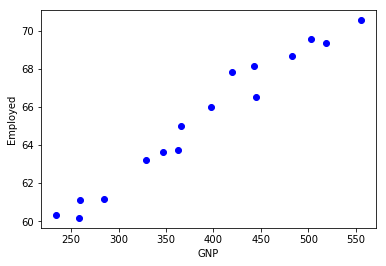

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

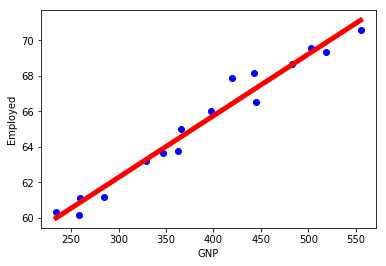

In [8]:
# En caso de ser necesario estandarizar los datos ejecutar:
# Media y desviación de los datos
# y_mean, y_std = data[:,1].mean(), data[:,1].std()
# X_mean, X_std = data[:,2].mean(), data[:,2].std()

# Datos estandarizados
# y = data[:,1] #(data[:,1] - y_mean)/ y_std
# X = data[:,2] #(data[:,2] - X_mean)/ X_std

# Con los datos originales:
y = data[:,1]
X = data[:,2]

# X con intercepto
X_ = np.c_[np.ones(X.shape[0]), X]

# Valores iniciales de los betas
beta_ini = ((np.matrix(X_.T)*np.matrix(X_))**-1)*(np.matrix(X_.T)*np.matrix(y).T)
beta_ini = np.squeeze(np.asarray(beta_ini))

# Función para ajustar el modelo lineal 
def lr_h(beta,x):
    return np.dot(beta, x.T)

# Plot
plt.scatter(X, y,c='b')

# Plot the linear regression
x = np.c_[np.ones(2), [X.min(), X.max()]]
plt.plot(x[:, 1], lr_h(beta_ini, x), 'r', lw=5)
plt.xlabel('GNP')
plt.ylabel('Employed')

# Exercise 01.3

Analyze the baby names dataset using pandas

In [9]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [10]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [11]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


In [13]:
sum(names[names.name=='Daniel'].prop)

1.1009319999999994

### segment the data into boy and girl names

In [13]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

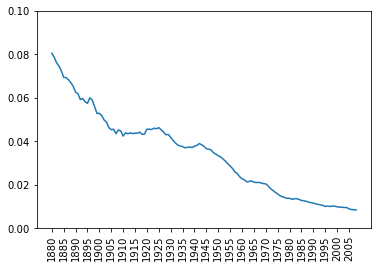

In [14]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

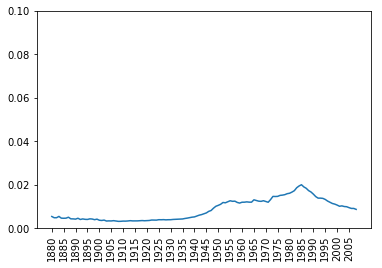

In [15]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

# Solución:

Primero creamos una variable que identifique a decada pertenece el registro, basándonos en la variable año:

In [139]:
names['decade']=(names.year//10)*10
#np.where(names['year']<1990,'80',np.where(names['year']<2000, '90', '00'))
names['decade'].value_counts()

1910    20000
1900    20000
1890    20000
1880    20000
1990    20000
1980    20000
1970    20000
1960    20000
1950    20000
1940    20000
1930    20000
1920    20000
2000    18000
Name: decade, dtype: int64

La anterior tabla muestra que las agrupaciones que se generaron pro decada, podemos observar que para cada decada contamos con 20.000 registros, a excepción de la década más reciente (2000's) que tiene 18.000 registros.

Ahora generamos dos bases de datos, separando a las mujeres de los hombres:

In [140]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

Mediante la función de pandas pivot_table es posible generar tablas agrupadas, el siguiente comando genera una tabla que agrupa la proporción de apariciones del nombre, sumando todos los años dependiendo la decada (solo para la base de hombres). 

In [142]:
boys_grp = pd.pivot_table(boys, index=['decade', 'name'],
                     aggfunc={'prop': 'sum'})

Con el siguiente loop es posible generar una tabla para cada decada, donde se registra cual fue el nombre más popular para los hombres y la suma de las proporciones para todos los años de la decada: 

In [143]:
from IPython.display import display, HTML

for i in list(boys_grp.index.levels[0]):
    print('decada:', i)
    display(boys_grp.loc[i][boys_grp.loc[i].prop==max(boys_grp.loc[i].prop)])
    

decada: 1880


,prop
name,
John,0.76488


decada: 1890


,prop
name,
John,0.655642


decada: 1900


,prop
name,
John,0.577876


decada: 1910


,prop
name,
John,0.544213


decada: 1920


,prop
name,
Robert,0.506538


decada: 1930


,prop
name,
Robert,0.544311


decada: 1940


,prop
name,
James,0.52746


decada: 1950


,prop
name,
James,0.413064


decada: 1960


,prop
name,
Michael,0.426833


decada: 1970


,prop
name,
Michael,0.413498


decada: 1980


,prop
name,
Michael,0.345842


decada: 1990


,prop
name,
Michael,0.224069


decada: 2000


,prop
name,
Jacob,0.119122


# Exercise 01.4

Which has been the most popular girl name?


# Solución:

Primero construimos una tabla pivote, donde agrupamos por los nombres de las mujeres, sumando las proporciones:

In [153]:
girls_grp1 = pd.pivot_table(girls, index=['name'],
                     aggfunc={'prop': 'sum'})

Ahora mediante un filtro obtenemos el nombre que más se repite durante toda la historia:

In [155]:
girls_grp1[girls_grp1.prop==max(girls_grp1.prop)]

,prop
name,
Mary,4.51186


El nombre que más común entre 1880 y 2005, fue Mary.

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

# Solución:

Creamos una tabla a partir de la base de mujeres, donde tomamos como indices la decada y el nombre, sumando las proporciones.

In [151]:
girls_grp = pd.pivot_table(girls, index=['decade', 'name'],
                     aggfunc={'prop': 'sum'})

Con este filtro, especificamos que queremos la decada de los 2000 y obtenemos la suma de la proporción màxima:

In [152]:
girls_grp.loc[2000][girls_grp.loc[2000].prop==max(girls_grp.loc[2000].prop)]

,prop
name,
Emily,0.1029


Se concluye que el nuevo nombre más popular entre las mujeres es Emily.